Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import ydata_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# models
from sklearn.linear_model import LassoCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv(r"C:\Users\okechukwu chude\Documents\MOdeling and optimisation\Heart disease prediction\heart_disease_uci.csv")

In [8]:
data.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
#checking for missing values
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [11]:
#renaming num column to target
data['target'] = data['num']
#removing irrelevant columns and columns with high missing values
data = data.drop(columns=['id', 'dataset', 'ca', 'thal', 'num'])

In [12]:
data = data[data['target'].isin([0, 1])]
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,1
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,0
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,0


In [14]:
#dropping rows with null values
data = data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       368 non-null    int64  
 1   sex       368 non-null    object 
 2   cp        368 non-null    object 
 3   trestbps  368 non-null    float64
 4   chol      368 non-null    float64
 5   fbs       368 non-null    object 
 6   restecg   368 non-null    object 
 7   thalch    368 non-null    float64
 8   exang     368 non-null    object 
 9   oldpeak   368 non-null    float64
 10  slope     368 non-null    object 
 11  target    368 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 34.6+ KB


Data Visualisation

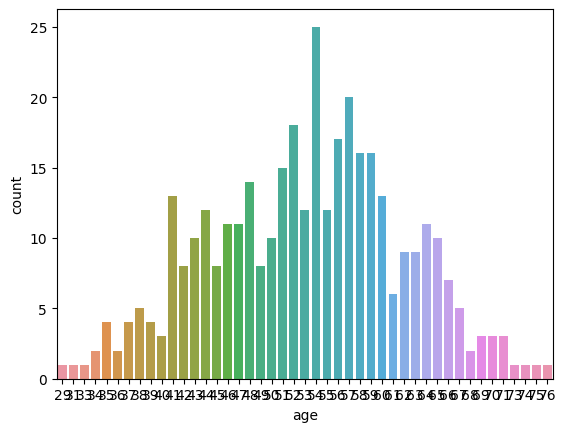

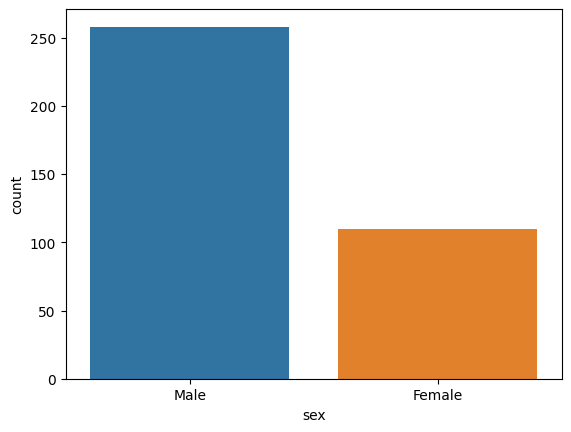

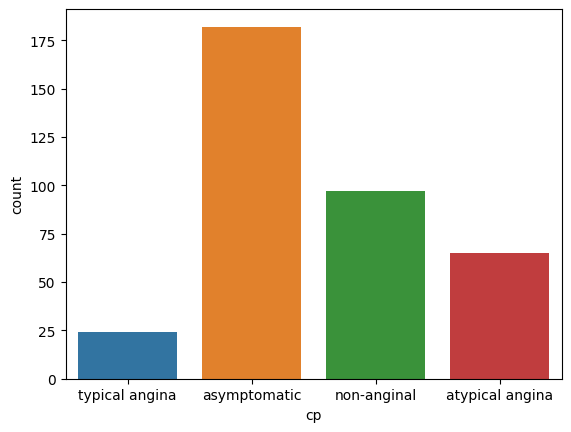

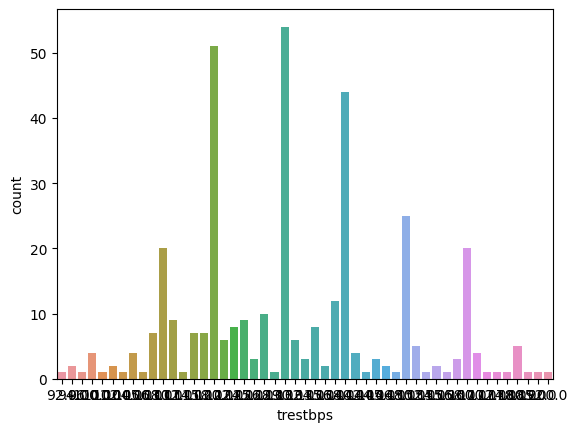

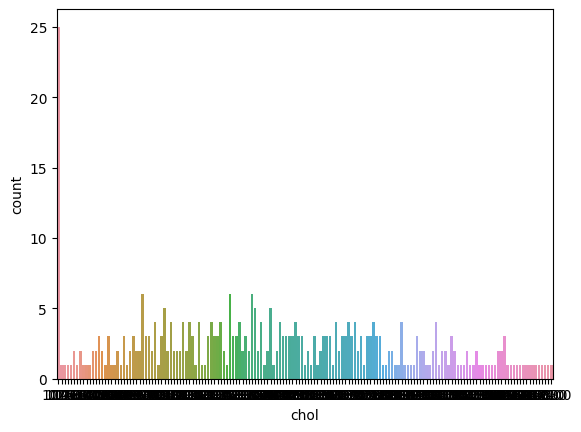

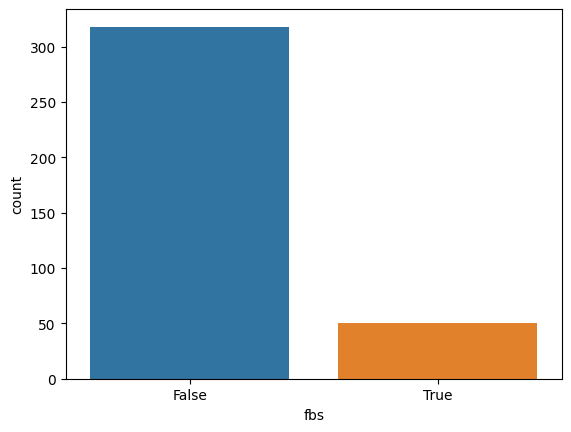

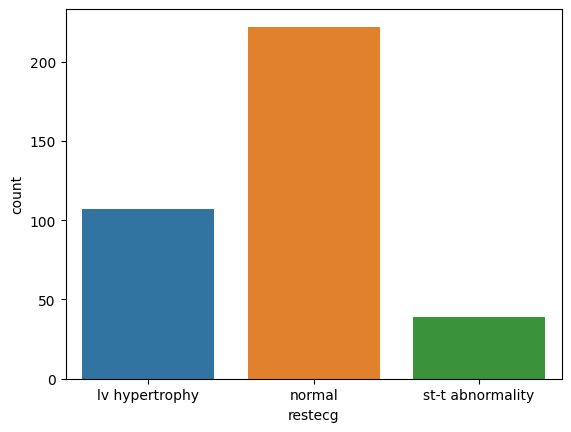

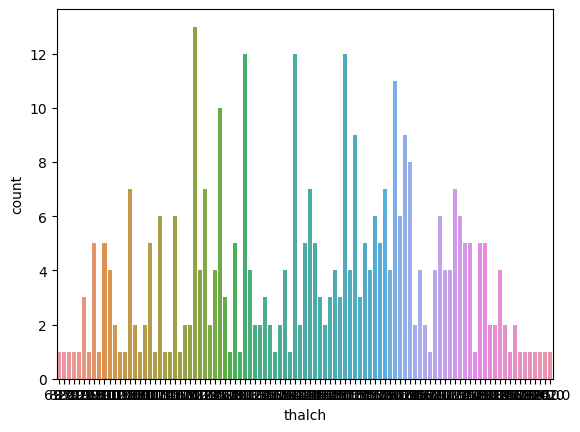

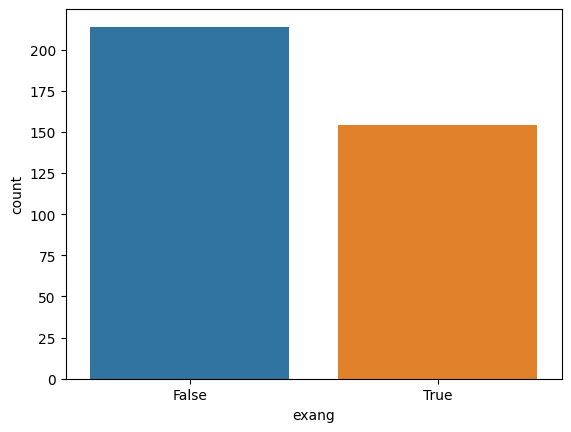

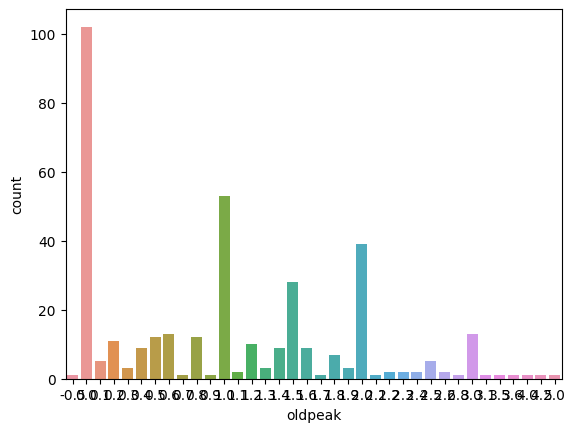

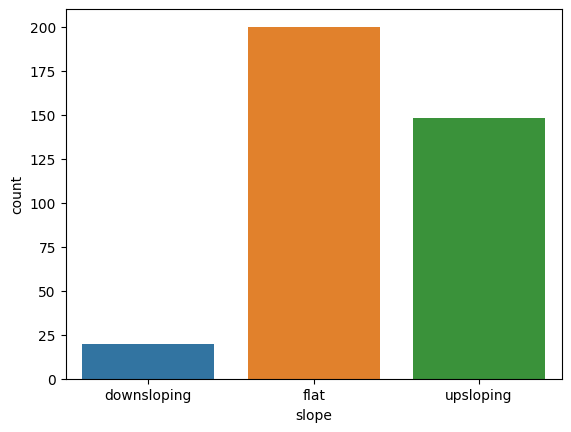

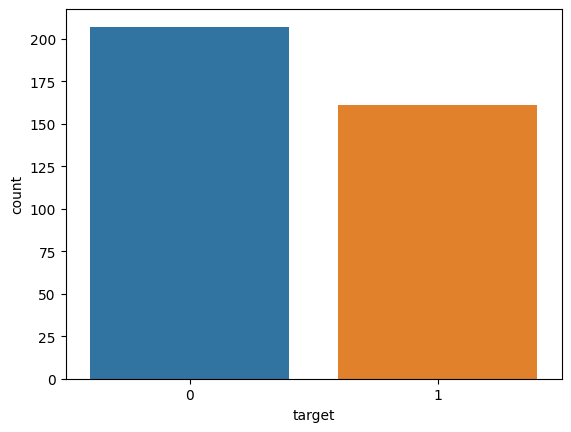

In [15]:
for i in data.columns: 
    sns.countplot(x = i, data = data)
    plt.show()

In [16]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to non-numerical columns
columns_to_encode = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'target']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [20]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
0,32,1,3,31,62,1,0,57,0,24,0,0
1,36,1,0,15,58,0,0,36,1,27,1,1
2,6,1,2,22,78,0,1,92,0,31,0,0


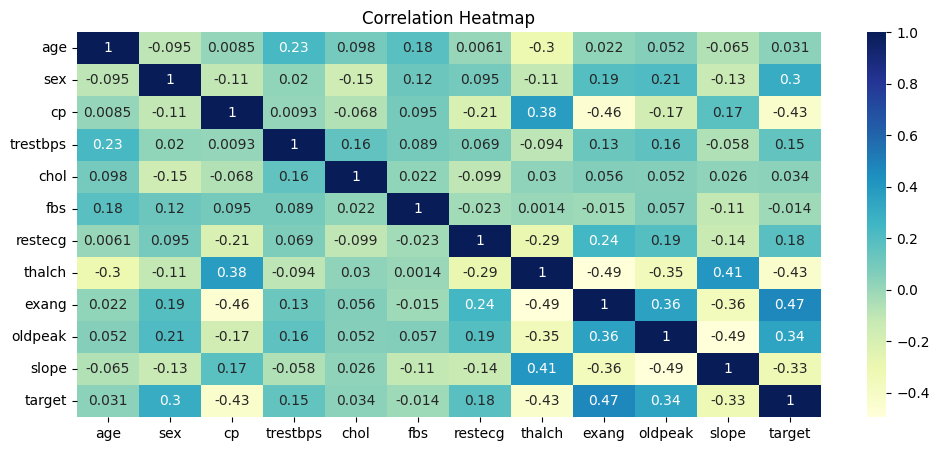

In [21]:
# Create a heat map
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
#num_features_opt = 25   # the number of features that we need to choose as a result
#num_features_max = 35   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

Feature Selection

In [ ]:
Uisng Pearson Correlation

In [23]:
# Threshold for removing correlated variables
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix = data.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.style.format("{:.2f}").applymap(highlight)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target
age,nan,0.09,0.01,0.23,0.10,0.18,0.01,0.30,0.02,0.05,0.06,0.03
sex,nan,nan,0.11,0.02,0.15,0.12,0.10,0.11,0.19,0.21,0.13,0.30
cp,nan,nan,nan,0.01,0.07,0.09,0.21,0.38,0.46,0.17,0.17,0.43
trestbps,nan,nan,nan,nan,0.16,0.09,0.07,0.09,0.13,0.16,0.06,0.15
chol,nan,nan,nan,nan,nan,0.02,0.10,0.03,0.06,0.05,0.03,0.03
fbs,nan,nan,nan,nan,nan,nan,0.02,0.00,0.01,0.06,0.11,0.01
restecg,nan,nan,nan,nan,nan,nan,nan,0.29,0.24,0.19,0.14,0.18
thalch,nan,nan,nan,nan,nan,nan,nan,nan,0.49,0.35,0.41,0.43
exang,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.36,0.36,0.47
oldpeak,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.49,0.34


In [26]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = data.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  12
